In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.feature_extraction import text
from wordcloud import WordCloud
from textblob import TextBlob

# Want to use NLP techniques and maybe some other stuff I can think of
this will not include deep learning stuff

In [3]:
ign_df = pd.read_pickle('ign_data/ign_data_pass_two.pkl')
ign_df.head()

,links,rough_review_body,cleaned_review_body,review_summary_rough,review_score,tags,categories,modified_date,published_date,author_name,tag_list,categories_list,review_title,review_body_corpus,review_score_float,number_character_review,number_words_review
1,https://www.ign.com/articles/2011/07/19/warham...,"\u003csection class=\""article-page\""\u003e\u00...",'Warhammer 40K: Kill Team might be unfortun...,"""And \""also-ran\"" hangs all over Warhammer 40K...",6.5,":[""review"",""blogroll"",""event-essentials"",""hot""...",":[""ign"",""ps3"",""xbox-360"",""xbox-live""],",2011-10-18T05:59:32+0000,2011-07-19T19:47:00+0000,"""Arthur Gies""","[review, blogroll, event-essentials, hot, lega...","[ign, ps3, xbox-360, xbox-live, ]","""Warhammer 40K: Kill Team Review""",warhammer 40k kill team might be unfortunat...,6.5,3705,642
2,https://www.ign.com/articles/2011/07/20/call-o...,"\u003csection class=\""article-page\""\u003eThe ...",The Call of Juarez franchise always intereste...,"""Call of Juarez: The Cartel is a poor change o...",4.5,":[""review"",""blogroll"",""call-of-juarez-the-cart...",":[""ign"",""pc"",""ps3"",""xbox-360""],",2011-10-18T06:02:02+0000,2011-07-20T00:14:00+0000,"""Anthony Gallegos""","[review, blogroll, call-of-juarez-the-cartel, ...","[ign, pc, ps3, xbox-360, ]","""Call of Juarez: The Cartel Review""",the call of juarez franchise always intereste...,4.5,3770,648
3,https://www.ign.com/articles/2011/07/20/captai...,"\u003csection class=\""article-page\""\u003eThe ...",The majority of movie games are just awful. S...,"""Captain America: Super Soldier is a mediocre ...",5.5,":[""review"",""blogroll"",""legacy"",""wii"",""games"",""...",":[""ign"",""wii""],",2011-10-18T06:02:20+0000,2011-07-20T00:43:00+0000,"""Audrey Drake""","[review, blogroll, legacy, wii, games, captain...","[ign, wii, ]","""Captain America: Super Soldier Wii Review""",the majority of movie games are just awful st...,5.5,2675,474
4,https://www.ign.com/articles/2011/07/20/quiz-c...,"\u003csection class=\""article-page\""\u003e\u00...","'Quiz Climber, from Buzz! developer 'Rele...","""Ultimately, Quiz Climber is just a little too...",6.5,":[""review"",""blogroll"",""games"",""legacy"",""wirele...",":[""ign"",""wireless""],",2011-10-18T06:07:06+0000,2011-07-20T21:44:00+0000,"""Justin Davis""","[review, blogroll, games, legacy, wireless, qu...","[ign, wireless, ]","""Quiz Climber Review""",quiz climber from buzz developer relentle...,6.5,1854,349
5,https://www.ign.com/articles/2011/07/20/limbo-...,"\u003csection class=\""article-page\""\u003eVide...",Video games are an art form made up of visual...,"""Limbo is an incredible achievement. Very few ...",9,":[""review"",""games"",""legacy"",""limbo"",""platforme...",":[""pc"",""ps3""],",2011-10-18T06:07:21+0000,2011-07-20T22:29:00+0000,"""Daemon Hatfield""","[review, games, legacy, limbo, platformer, pla...","[pc, ps3, ]","""Limbo Review""",video games are an art form made up of visual...,9.0,2938,527


In [48]:
print(type(ign_df['review_score_float'].loc[1]))
# remove duplicated rows if any exist
test_df = ign_df[ign_df.duplicated(['cleaned_review_body'])]
ign_df = ign_df[~ign_df.duplicated(['cleaned_review_body'])]
# print(test_df.shape)
# test_df.head()

# ign_df.duplicated(['cleaned_review_body'])
# ~(ign_df['review_score_float']==10.0)
print(ign_df.shape)
ign_df.head()

<class 'numpy.float64'>
(11072, 19)


,links,rough_review_body,cleaned_review_body,review_summary_rough,review_score,tags,categories,modified_date,published_date,author_name,tag_list,categories_list,review_title,review_body_corpus,review_score_float,number_character_review,number_words_review,polarity,subjectivity
1,https://www.ign.com/articles/2011/07/19/warham...,"\u003csection class=\""article-page\""\u003e\u00...",'Warhammer 40K: Kill Team might be unfortun...,"""And \""also-ran\"" hangs all over Warhammer 40K...",6.5,":[""review"",""blogroll"",""event-essentials"",""hot""...",":[""ign"",""ps3"",""xbox-360"",""xbox-live""],",2011-10-18T05:59:32+0000,2011-07-19T19:47:00+0000,"""Arthur Gies""","[review, blogroll, event-essentials, hot, lega...","[ign, ps3, xbox-360, xbox-live, ]","""Warhammer 40K: Kill Team Review""",warhammer 40k kill team might be unfortunat...,6.5,3705,642,0.062923,0.433371
2,https://www.ign.com/articles/2011/07/20/call-o...,"\u003csection class=\""article-page\""\u003eThe ...",The Call of Juarez franchise always intereste...,"""Call of Juarez: The Cartel is a poor change o...",4.5,":[""review"",""blogroll"",""call-of-juarez-the-cart...",":[""ign"",""pc"",""ps3"",""xbox-360""],",2011-10-18T06:02:02+0000,2011-07-20T00:14:00+0000,"""Anthony Gallegos""","[review, blogroll, call-of-juarez-the-cartel, ...","[ign, pc, ps3, xbox-360, ]","""Call of Juarez: The Cartel Review""",the call of juarez franchise always intereste...,4.5,3770,648,-0.016471,0.457898
3,https://www.ign.com/articles/2011/07/20/captai...,"\u003csection class=\""article-page\""\u003eThe ...",The majority of movie games are just awful. S...,"""Captain America: Super Soldier is a mediocre ...",5.5,":[""review"",""blogroll"",""legacy"",""wii"",""games"",""...",":[""ign"",""wii""],",2011-10-18T06:02:20+0000,2011-07-20T00:43:00+0000,"""Audrey Drake""","[review, blogroll, legacy, wii, games, captain...","[ign, wii, ]","""Captain America: Super Soldier Wii Review""",the majority of movie games are just awful st...,5.5,2675,474,-0.003842,0.544458
4,https://www.ign.com/articles/2011/07/20/quiz-c...,"\u003csection class=\""article-page\""\u003e\u00...","'Quiz Climber, from Buzz! developer 'Rele...","""Ultimately, Quiz Climber is just a little too...",6.5,":[""review"",""blogroll"",""games"",""legacy"",""wirele...",":[""ign"",""wireless""],",2011-10-18T06:07:06+0000,2011-07-20T21:44:00+0000,"""Justin Davis""","[review, blogroll, games, legacy, wireless, qu...","[ign, wireless, ]","""Quiz Climber Review""",quiz climber from buzz developer relentle...,6.5,1854,349,0.091160,0.600205
5,https://www.ign.com/articles/2011/07/20/limbo-...,"\u003csection class=\""article-page\""\u003eVide...",Video games are an art form made up of visual...,"""Limbo is an incredible achievement. Very few ...",9,":[""review"",""games"",""legacy"",""limbo"",""platforme...",":[""pc"",""ps3""],",2011-10-18T06:07:21+0000,2011-07-20T22:29:00+0000,"""Daemon Hatfield""","[review, games, legacy, limbo, platformer, pla...","[pc, ps3, ]","""Limbo Review""",video games are an art form made up of visual...,9.0,2938,527,0.096551,0.525587


In [49]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

ign_df['polarity'] = ign_df['review_body_corpus'].apply(pol)
ign_df['subjectivity'] = ign_df['review_body_corpus'].apply(sub)
ign_df.head()

,links,rough_review_body,cleaned_review_body,review_summary_rough,review_score,tags,categories,modified_date,published_date,author_name,tag_list,categories_list,review_title,review_body_corpus,review_score_float,number_character_review,number_words_review,polarity,subjectivity
1,https://www.ign.com/articles/2011/07/19/warham...,"\u003csection class=\""article-page\""\u003e\u00...",'Warhammer 40K: Kill Team might be unfortun...,"""And \""also-ran\"" hangs all over Warhammer 40K...",6.5,":[""review"",""blogroll"",""event-essentials"",""hot""...",":[""ign"",""ps3"",""xbox-360"",""xbox-live""],",2011-10-18T05:59:32+0000,2011-07-19T19:47:00+0000,"""Arthur Gies""","[review, blogroll, event-essentials, hot, lega...","[ign, ps3, xbox-360, xbox-live, ]","""Warhammer 40K: Kill Team Review""",warhammer 40k kill team might be unfortunat...,6.5,3705,642,0.062923,0.433371
2,https://www.ign.com/articles/2011/07/20/call-o...,"\u003csection class=\""article-page\""\u003eThe ...",The Call of Juarez franchise always intereste...,"""Call of Juarez: The Cartel is a poor change o...",4.5,":[""review"",""blogroll"",""call-of-juarez-the-cart...",":[""ign"",""pc"",""ps3"",""xbox-360""],",2011-10-18T06:02:02+0000,2011-07-20T00:14:00+0000,"""Anthony Gallegos""","[review, blogroll, call-of-juarez-the-cartel, ...","[ign, pc, ps3, xbox-360, ]","""Call of Juarez: The Cartel Review""",the call of juarez franchise always intereste...,4.5,3770,648,-0.016471,0.457898
3,https://www.ign.com/articles/2011/07/20/captai...,"\u003csection class=\""article-page\""\u003eThe ...",The majority of movie games are just awful. S...,"""Captain America: Super Soldier is a mediocre ...",5.5,":[""review"",""blogroll"",""legacy"",""wii"",""games"",""...",":[""ign"",""wii""],",2011-10-18T06:02:20+0000,2011-07-20T00:43:00+0000,"""Audrey Drake""","[review, blogroll, legacy, wii, games, captain...","[ign, wii, ]","""Captain America: Super Soldier Wii Review""",the majority of movie games are just awful st...,5.5,2675,474,-0.003842,0.544458
4,https://www.ign.com/articles/2011/07/20/quiz-c...,"\u003csection class=\""article-page\""\u003e\u00...","'Quiz Climber, from Buzz! developer 'Rele...","""Ultimately, Quiz Climber is just a little too...",6.5,":[""review"",""blogroll"",""games"",""legacy"",""wirele...",":[""ign"",""wireless""],",2011-10-18T06:07:06+0000,2011-07-20T21:44:00+0000,"""Justin Davis""","[review, blogroll, games, legacy, wireless, qu...","[ign, wireless, ]","""Quiz Climber Review""",quiz climber from buzz developer relentle...,6.5,1854,349,0.091160,0.600205
5,https://www.ign.com/articles/2011/07/20/limbo-...,"\u003csection class=\""article-page\""\u003eVide...",Video games are an art form made up of visual...,"""Limbo is an incredible achievement. Very few ...",9,":[""review"",""games"",""legacy"",""limbo"",""platforme...",":[""pc"",""ps3""],",2011-10-18T06:07:21+0000,2011-07-20T22:29:00+0000,"""Daemon Hatfield""","[review, games, legacy, limbo, platformer, pla...","[pc, ps3, ]","""Limbo Review""",video games are an art form made up of visual...,9.0,2938,527,0.096551,0.525587


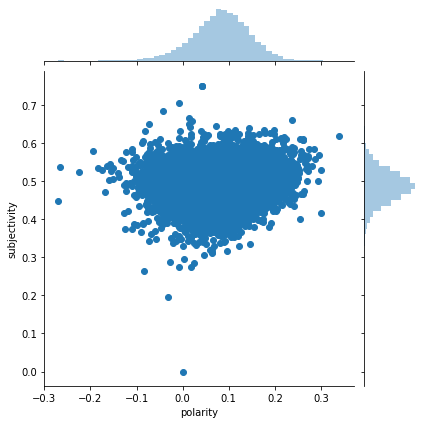

In [50]:
sns.jointplot(x='polarity', y='subjectivity', data=ign_df)
plt.show()

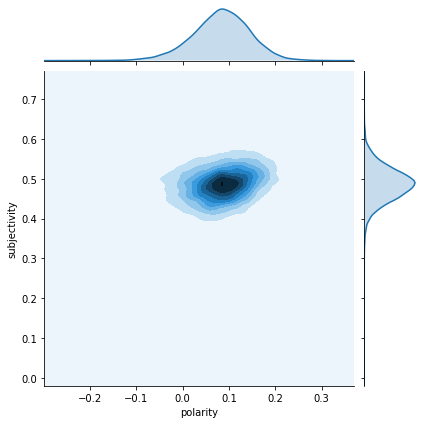

In [51]:
sns.jointplot(x='polarity', y='subjectivity', data=ign_df, kind='kde')
plt.show()

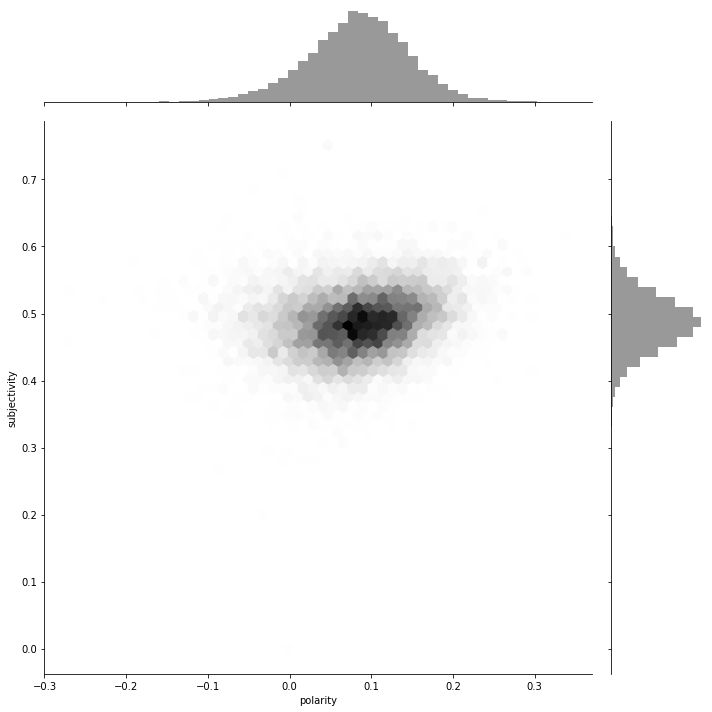

In [52]:
sns.jointplot(x='polarity', y='subjectivity', data=ign_df, 
              kind='hex', color='k', height=10)
plt.show()

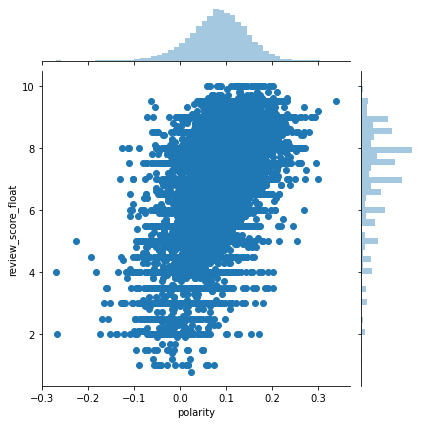

In [53]:
sns.jointplot(x='polarity', y='review_score_float', data=ign_df)
plt.show()

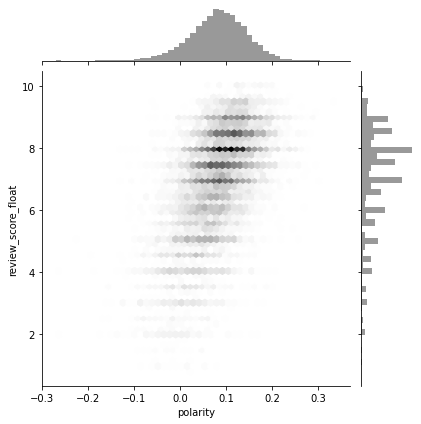

0.543861051482053


In [54]:
sns.jointplot(x='polarity', y='review_score_float', data=ign_df, kind='hex', color='k')
plt.show()

# find the correlation
col1 = ign_df['polarity']
col2 = ign_df['review_score_float']
polarity_review_correlation = col1.corr(col2)
print(polarity_review_correlation)

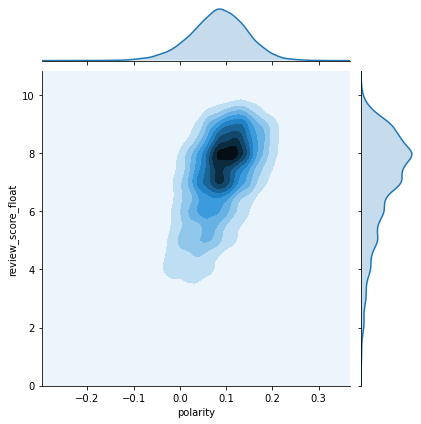

In [55]:
sns.jointplot(x='polarity', y='review_score_float', data=ign_df, kind='kde')
plt.show()

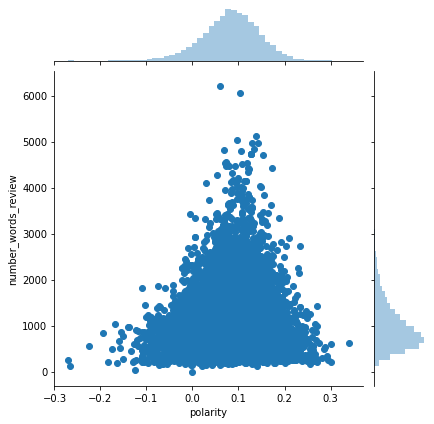

0.1029534274598527


In [133]:
sns.jointplot(x='polarity', y='number_words_review', data=ign_df)
plt.show()
col1 = ign_df['polarity']
col2 = ign_df['number_words_review']
polarity_number_correlation = col1.corr(col2)
print(polarity_number_correlation)

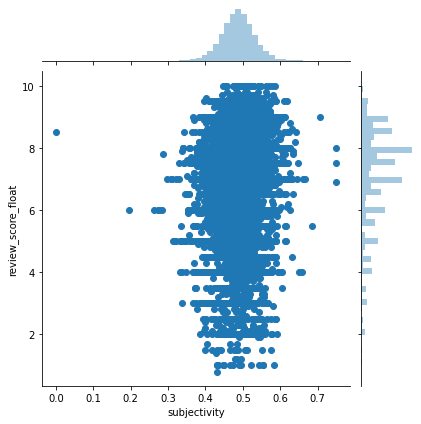

0.10901284189367653


In [83]:
sns.jointplot(x='subjectivity', y='review_score_float', data=ign_df)
plt.show()

col1 = ign_df['subjectivity']
col2 = ign_df['review_score_float']
subjectivity_review_correlation = col1.corr(col2)
print(subjectivity_review_correlation)

(230, 19)
(36, 19)


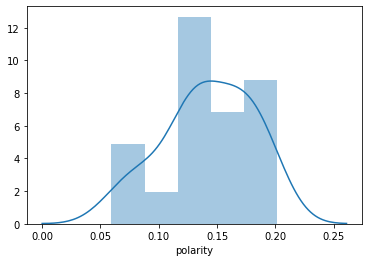

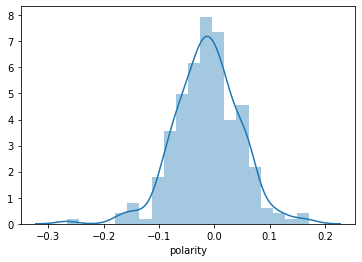

In [60]:
# examine the highest polarities and highest scores
high_scores_df = ign_df.loc[ign_df['review_score_float']==10.0]
low_scores_df = ign_df.loc[ign_df['review_score_float']<3.0]

print(low_scores_df.shape)
print(high_scores_df.shape)
# high_scores_df
sns.distplot(high_scores_df['polarity'])
plt.show()

sns.distplot(low_scores_df['polarity'])
plt.show()

In [78]:
review_score_midpoints = [(0.5+x) for x in range(1,9)]

ign_array_dfs = [ign_df.loc[(ign_df['review_score_float']>=x-0.5) & 
                                      (ign_df['review_score_float']<x+0.5) ] 
                  for x in review_score_midpoints ]
# picking up the edge case
review_score_midpoints.append(9.5)
ign_array_dfs.append(ign_df.loc[(ign_df['review_score_float']>=9.0) & 
                                      (ign_df['review_score_float']<=10)] )

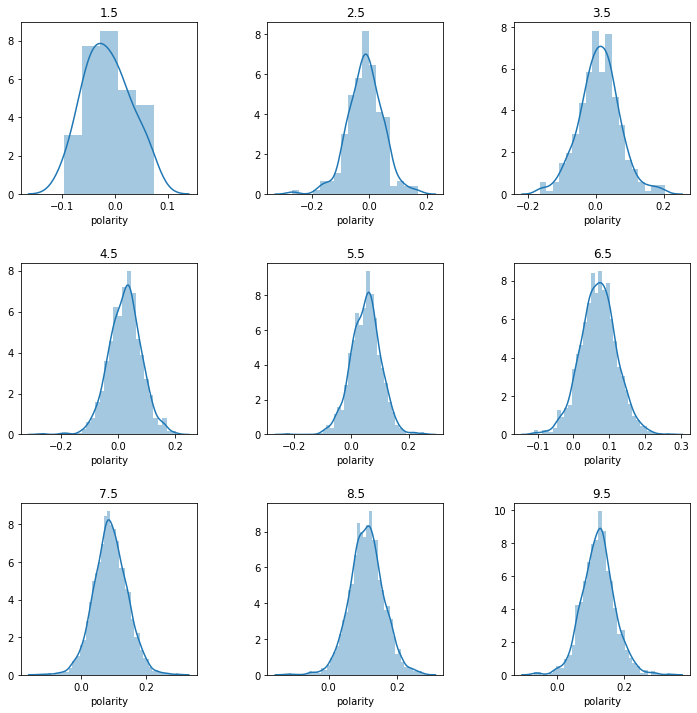

In [79]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0,len(review_score_midpoints)):
    ax = fig.add_subplot(3,3,i+1)
    plt.title('{}'.format(review_score_midpoints[i]))
    sns.distplot(ign_array_dfs[i]['polarity'])

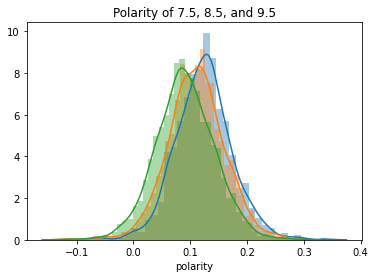

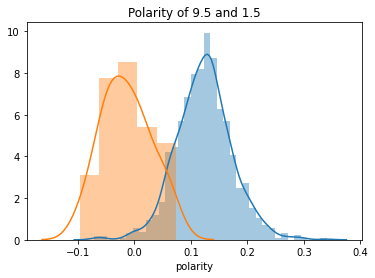

In [89]:
sns.distplot(ign_array_dfs[8]['polarity'])
sns.distplot(ign_array_dfs[7]['polarity'])
sns.distplot(ign_array_dfs[6]['polarity'])
plt.title('Polarity of 7.5, 8.5, and 9.5')
plt.show()

sns.distplot(ign_array_dfs[8]['polarity'])
sns.distplot(ign_array_dfs[0]['polarity'])
plt.title('Polarity of 9.5 and 1.5')
plt.show()

In [80]:
ign_polarity_means = [pd.DataFrame.mean(x['polarity']) for x in ign_array_dfs]
ign_polarity_std = [pd.DataFrame.std(x['polarity']) for x in ign_array_dfs]

# ign_polarity_std[0] = 1
print(ign_polarity_means)
print(ign_polarity_std)

[-0.014205834903489449, -0.013088817993395759, 0.011000493815820413, 0.024038108296392448, 0.050931024407782535, 0.06994867456614749, 0.09131422942319456, 0.1106285007817424, 0.12343991004905958]
[0.04341439069502324, 0.06136837585609959, 0.05995391832642983, 0.05733240151759401, 0.0517759210801954, 0.05078631315832945, 0.051632144622981525, 0.04998389256682129, 0.04952256887126148]


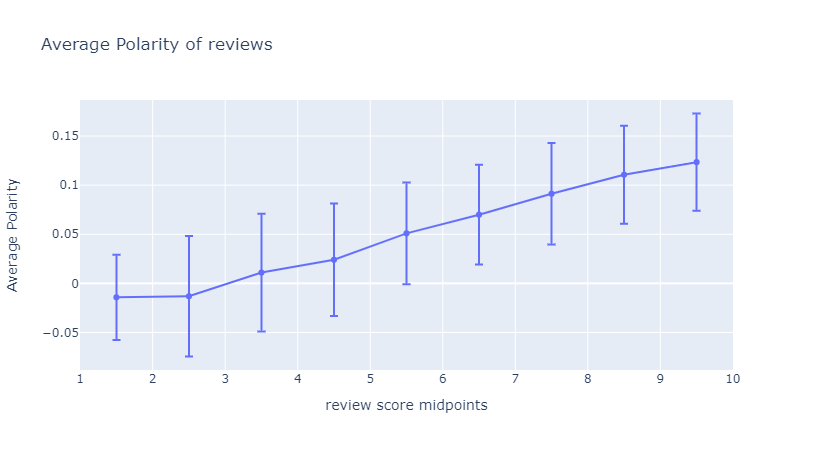

In [82]:
fig = go.Figure(data=go.Scatter(x=review_score_midpoints, 
                                y=ign_polarity_means, 
                                error_y=dict(type='data', 
                                             array=ign_polarity_std)))
fig.update_layout(title='Average Polarity of reviews', 
                  xaxis_title='review score midpoints', yaxis_title='Average Polarity')
fig.update_xaxes(dtick=1.0)
fig.show()

# Exploring Polarity further
So it could be the case that maybe how subjective a review is is indicative of how strong of an affect the polarity is on the review score (i.e. a less subjective review would have review scores that more strongly reflect the polarity of the review)

## Further question
Does a lower subjectivity restrict the spread in scores based on polarity?

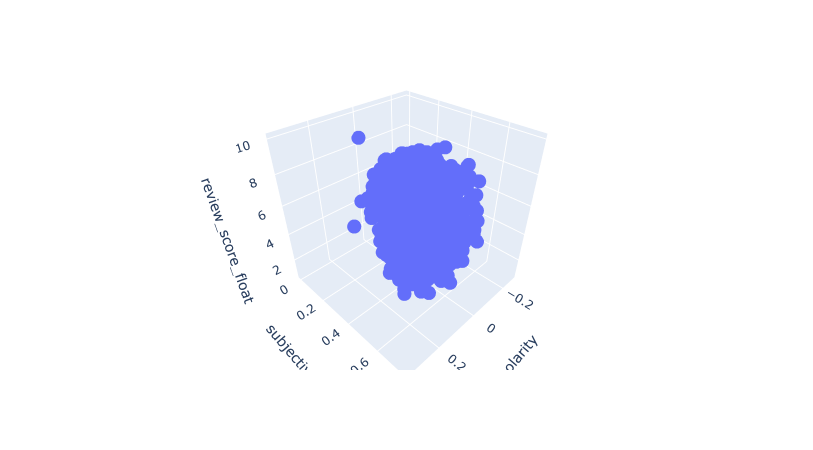

In [90]:
fig = px.scatter_3d(x='polarity', y='subjectivity', z='review_score_float', data_frame=ign_df)
fig.show()

## Not too revealing, so let's try cuts in subjectivity

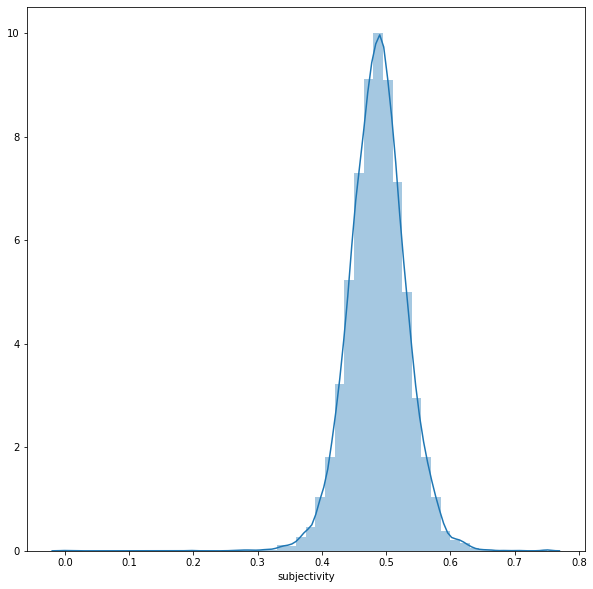

In [98]:
plt.figure(figsize=(10,10))
sns.distplot(ign_df['subjectivity'])
plt.show()

In [93]:
ign_df.describe()

,review_score_float,number_character_review,number_words_review,polarity,subjectivity
count,11072.000000,11072.000000,11072.000000,11072.000000,11072.000000
mean,7.008011,6001.000090,1041.775650,0.083117,0.486730
std,1.671266,3556.818591,616.203171,0.061378,0.043808
min,0.800000,3.000000,3.000000,-0.270000,0.000000
25%,6.000000,3563.000000,631.000000,0.045420,0.459187
50%,7.400000,5123.000000,885.000000,0.085253,0.487145
75%,8.200000,7467.250000,1284.000000,0.123853,0.513698
max,10.000000,36694.000000,6215.000000,0.340038,0.750000


In [102]:
low_sub_df = ign_df.loc[ign_df['subjectivity']<0.4]
high_sub_df = ign_df.loc[ign_df['subjectivity']>0.57]
print(low_sub_df.shape, high_sub_df.shape)

(278, 19) (318, 19)


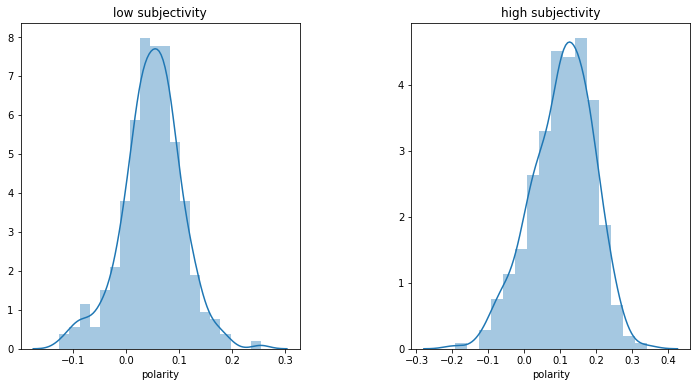

In [108]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1,2,1)
plt.title('low subjectivity')
sns.distplot(low_sub_df['polarity'])
ax = fig.add_subplot(1,2,2)
plt.title('high subjectivity')
sns.distplot(high_sub_df['polarity'])
plt.show()

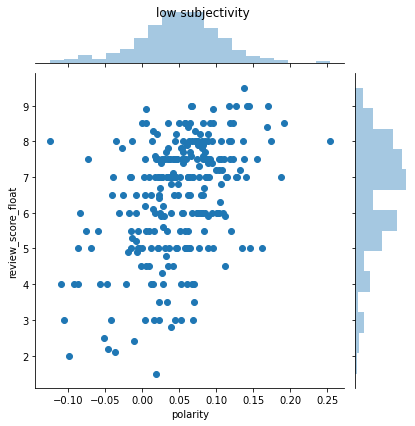

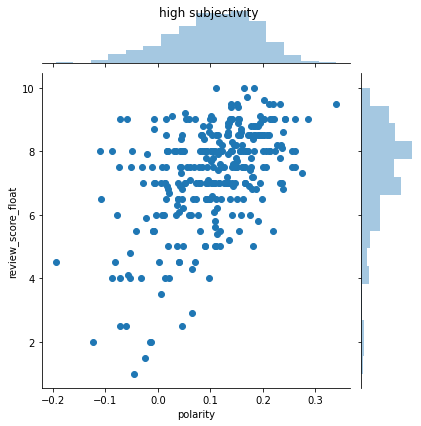

In [123]:
# fig = plt.figure(figsize=(12,6))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
# ax = fig.add_subplot(1,2,1)
plot1 = sns.jointplot(x='polarity', y='review_score_float', data=low_sub_df)
plot1.fig.suptitle('low subjectivity')
# plt.title('low subjectivity')
plt.show()
# ax = fig.add_subplot(1,2,2)
plot2 = sns.jointplot(x='polarity', y='review_score_float', data=high_sub_df)
plot2.fig.suptitle('high subjectivity')
# plt.title('high subjectivity')
plt.show()

So the idea that subjectivity might be some measure of 'elasticity' of a review score isn't looking too great, but let's examine some score slices to be sure

In [115]:
lowsub_78_df = low_sub_df.loc[(low_sub_df['review_score_float']>=7.0) & 
                              (low_sub_df['review_score_float']<=8.0)]
highsub_78_df = high_sub_df.loc[(high_sub_df['review_score_float']>=7.0) & 
                              (high_sub_df['review_score_float']<=8.0)]

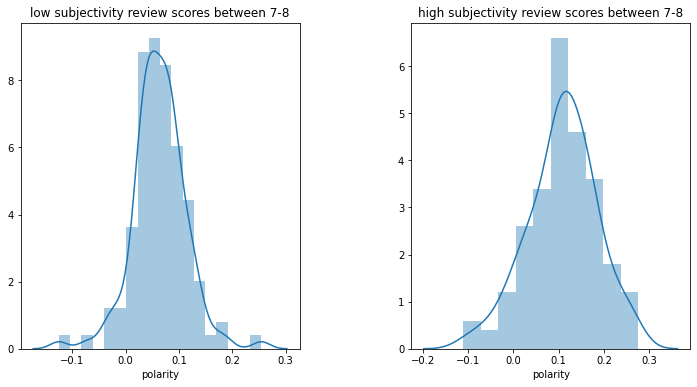

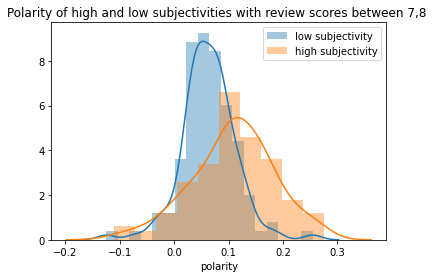

In [122]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1,2,1)
plt.title('low subjectivity review scores between 7-8')
sns.distplot(lowsub_78_df['polarity'])
ax = fig.add_subplot(1,2,2)
plt.title('high subjectivity review scores between 7-8')
sns.distplot(highsub_78_df['polarity'])
plt.show()

hist1 = sns.distplot(lowsub_78_df['polarity'], label='low subjectivity')
hist2 = sns.distplot(highsub_78_df['polarity'], label='high subjectivity')
plt.title('Polarity of high and low subjectivities with review scores between 7,8 ')
plt.legend()
plt.show()

So, it doesn't really look like there's a distinct difference between high and low subjectivity, but let's try a few more bins

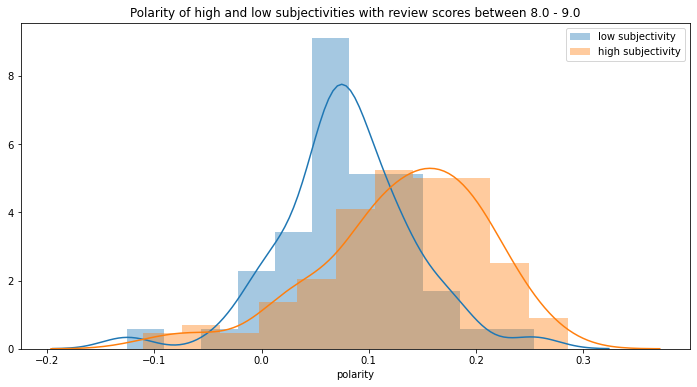

In [131]:
lowcut = 8.0
highcut = 1.0 + lowcut

lowsub_scorecut_df = low_sub_df.loc[(low_sub_df['review_score_float']>=lowcut) & 
                              (low_sub_df['review_score_float']<=highcut)]
highsub_scorecut_df = high_sub_df.loc[(high_sub_df['review_score_float']>=lowcut) & 
                              (high_sub_df['review_score_float']<=highcut)]

fig = plt.figure(figsize=(12,6))
hist1 = sns.distplot(lowsub_scorecut_df['polarity'], label='low subjectivity')
hist2 = sns.distplot(highsub_scorecut_df['polarity'], label='high subjectivity')
plt.title('Polarity of high and low subjectivities with review scores between {} - {}'.format(lowcut,highcut))
plt.legend()
plt.show()

Before I leave this topic, I should look at the relationship between number of words, polarity, and review score, since both of those have some correlation to review score

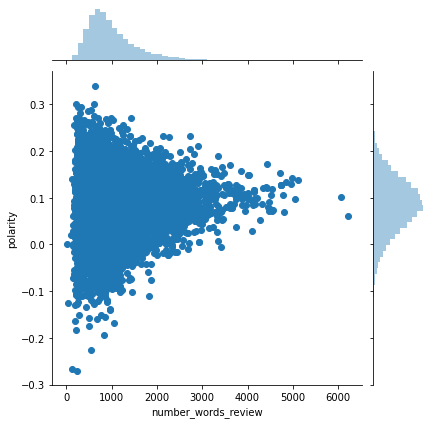

In [132]:
sns.jointplot(x='number_words_review', y='polarity', data=ign_df)

No real correlation here, so that will help with any cuts if we wanted to make them

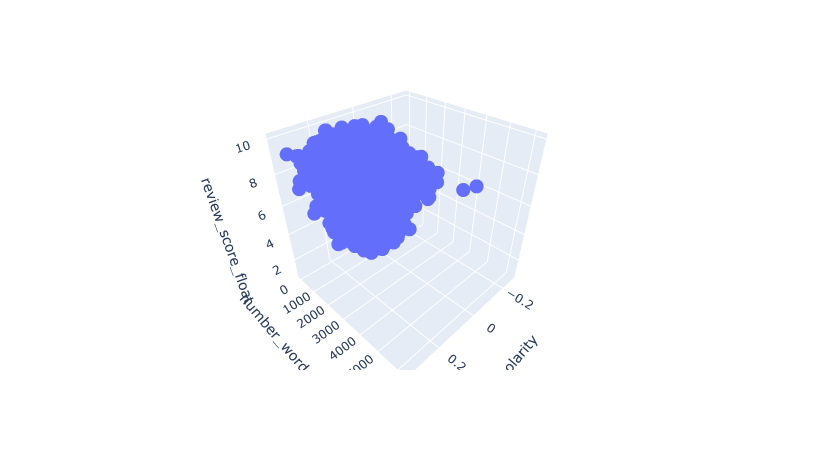

In [134]:
fig = px.scatter_3d(x='polarity', y='number_words_review', z='review_score_float', data_frame=ign_df)
fig.show()

The plot shows some structure, but it's likely not enough to get nice separation. 

I already have the ign_array_dfs, might as well use them again

9
9


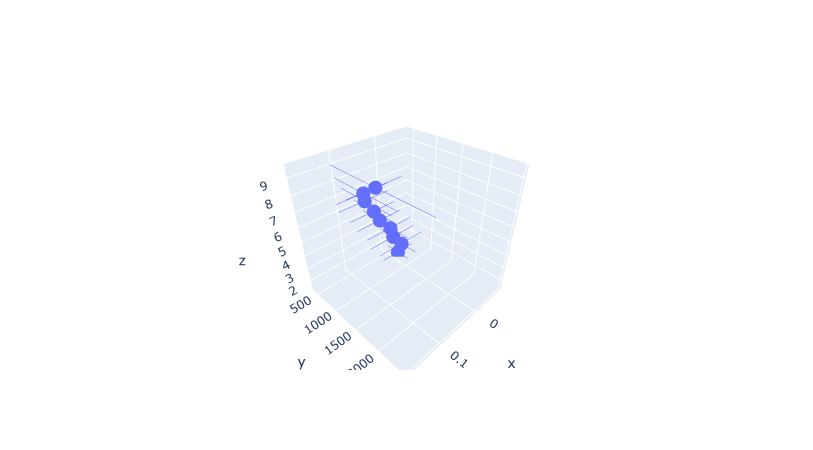

In [145]:
ign_word_means = [pd.DataFrame.mean(x['number_words_review']) for x in ign_array_dfs]
ign_word_std = [pd.DataFrame.std(x['number_words_review']) for x in ign_array_dfs]

# ign_polarity_means = [pd.DataFrame.mean(x['polarity']) for x in ign_array_dfs]
# ign_polarity_std = [pd.DataFrame.std(x['polarity']) for x in ign_array_dfs]
# print(review_score_midpoints)
print(len(ign_word_std))
print(len(ign_polarity_std))
# go.Scatter3d()
fig = go.Figure(data=go.Scatter3d(x=ign_polarity_means, y=ign_word_means, z=review_score_midpoints, 
                                   error_x=dict(type='data', array=ign_polarity_std), 
                                   error_y=dict(type='data', array=ign_word_std) ) )
# fig.update_layout(title='Stuff', 
#                   xaxis_title= 'average polarity', 
#                   yaxis_title='average number of words', 
#                   zaxis_title='review score midpoint')
fig.show()

So, while a cool plot, doesn't really reveal anything except that I really can't tell what's happening. While there is some kind of correlation, the spread of values is too large

# Next thing
Should examine polarity/subjectivity as a function of fraction of the review. So plot sentiment sentence by sentence essentially